<a href="https://colab.research.google.com/github/Min0627/Kaggle-Spaceship-Titanic-Project/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

spaceship_titanic_path = kagglehub.competition_download('spaceship-titanic')

print('Data source import complete.')


In [ ]:
pip install tabulate

------------------------------------------------------------------------------------------
Train 10 Pasengers Datasets
------------------------------------------------------------------------------------------
  PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7     0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0  False   
8     0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
9     0008_01     Europa      True  B/1/P    55 Cancri e  14

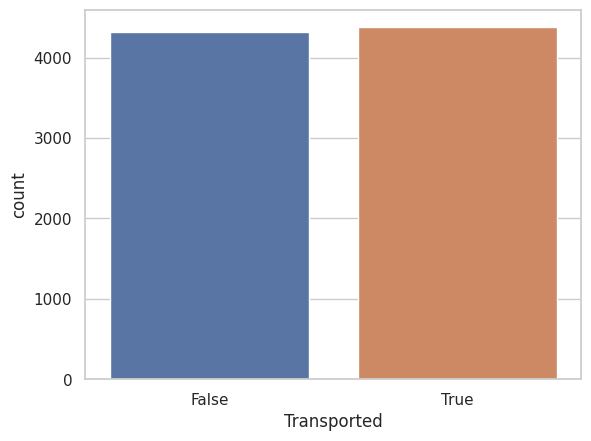



Validation Accuracy: 77.69%
Length of test_data: 4277
Length of predictions: 4277


Sample of the submission:
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False
5     0027_01         True
6     0029_01         True
7     0032_01         True
8     0032_02         True
9     0033_01        False




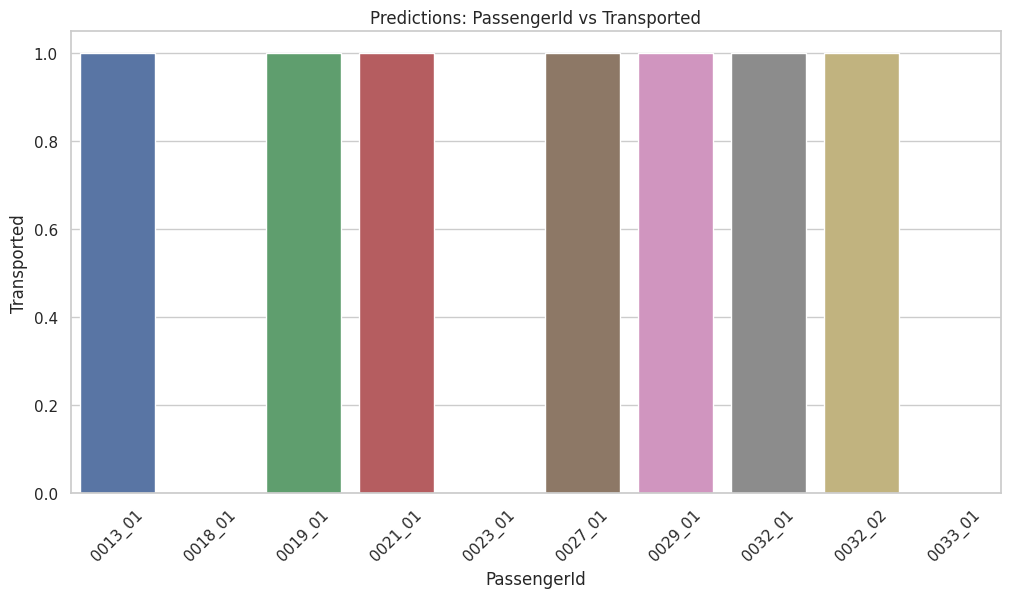

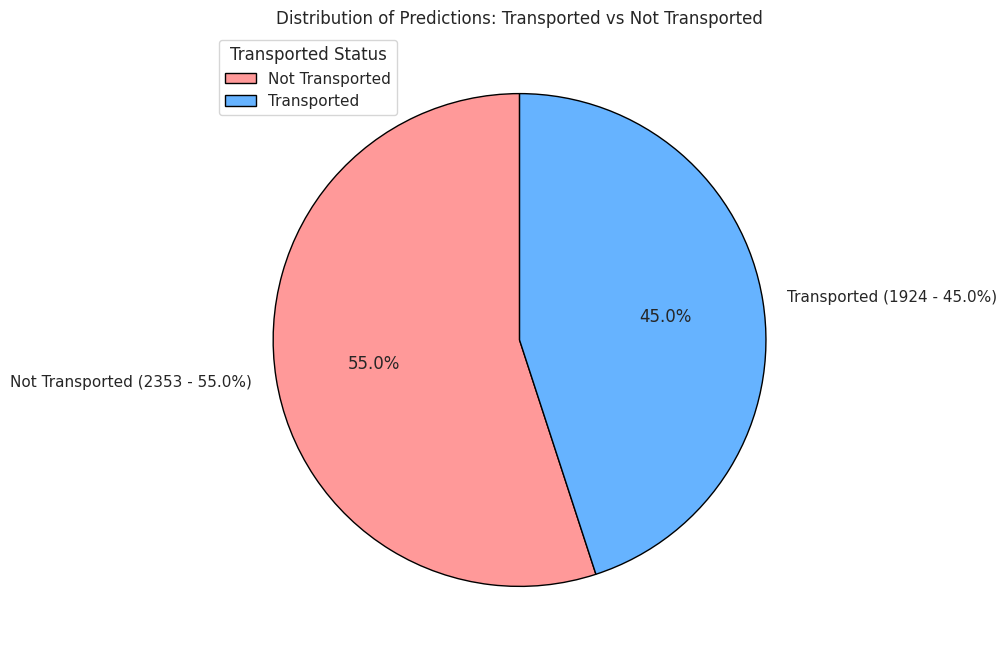



Passenger IDs in column format:


TypeError: 'method' object is not iterable

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.display import display
from tabulate import tabulate


# Load data
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

# Basic info
print("-" * 90)
print("Train 10 Pasengers Datasets")
print("-" * 90)
print(train_data.head(10))
print("\n")
print("-" * 90)
print("Test 10 Pasengers Datasets")
print("-" * 90)
print(test_data.head(10))
print("\n")

# Dataset info
print("-" * 90)
print("Info for Train Datasets")
print("-" * 90)
print(train_data.info())
print("\n")
print("-" * 90)
print("Info for Test Datasets")
print("-" * 90)
print(test_data.info())
print("\n")

# Data descriptions
print("-" * 90)
print("Descriptions of Train Datasets")
print("-" * 90)
print(train_data.describe())
print("\n")
print("-" * 90)
print("Descriptions of Test Datasets")
print("-" * 90)
print(test_data.describe())
print("\n")

# Missing values
print("-" * 90)
print("Missing Values for Train Dataset")
print("-" * 90)
print(train_data.isnull().sum())
print("\n")
print("-" * 90)
print("Missing Values for Test Dataset")
print("-" * 90)
print(test_data.isnull().sum())
print("\n")

# Plot target distribution
sns.countplot(data=train_data, x='Transported')
plt.show()

# Fill missing values in specific columns
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
test_data['HomePlanet'] = test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0])

train_data['VIP'] = train_data['VIP'].fillna(False).astype(int)
test_data['VIP'] = test_data['VIP'].fillna(False).astype(int)

# One-hot encoding for categorical variables
train_data = pd.get_dummies(train_data, columns=['HomePlanet', 'Destination'])
test_data = pd.get_dummies(test_data, columns=['HomePlanet', 'Destination'])

# Calculate TotalSpending as sum of relevant features
train_data['TotalSpending'] = train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test_data['TotalSpending'] = test_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

# Fill missing TotalSpending with 0
train_data['TotalSpending'] = train_data['TotalSpending'].fillna(0)
test_data['TotalSpending'] = test_data['TotalSpending'].fillna(0)

# Drop irrelevant columns from train_data but keep PassengerId in test_data
train_data.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)
# Ensure 'PassengerId' is preserved in test_data
test_data.drop(['Name', 'Cabin'], axis=1, inplace=True)

# Define features and target variable
features = ['Age', 'VIP', 'TotalSpending', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X = train_data[features]
y = train_data['Transported']

# Split train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in validation set
X_val['TotalSpending'] = X_val['TotalSpending'].fillna(0)

# Model pipeline with preprocessing and classifier
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpending']
numerical_transformer = SimpleImputer(strategy='median')

# Combine preprocessing in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
    ]
)

# Create a pipeline with preprocessing and RandomForest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Validate the model
y_pred = pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)*100
print("\n")
print(f"Validation Accuracy: {accuracy:.2f}%")

# Prepare test data for predictions
X_test = test_data[features]

# Fill missing values directly in the test set (avoiding the warning)
X_test.loc[:, 'TotalSpending'] = X_test['TotalSpending'].fillna(0)
X_test.loc[:, 'Age'] = X_test['Age'].fillna(train_data['Age'].median())
X_test.loc[:, 'RoomService'] = X_test['RoomService'].fillna(0)
X_test.loc[:, 'FoodCourt'] = X_test['FoodCourt'].fillna(0)
X_test.loc[:, 'ShoppingMall'] = X_test['ShoppingMall'].fillna(0)
X_test.loc[:, 'Spa'] = X_test['Spa'].fillna(0)
X_test.loc[:, 'VRDeck'] = X_test['VRDeck'].fillna(0)

# Predict on test data
predictions = pipeline.predict(X_test)

# Verify the length of the test data and predictions
print("Length of test_data:", len(test_data))
print("Length of predictions:", len(predictions))
print("\n")

# Create the submission DataFrame
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': predictions})

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Show the first few rows of the submission DataFrame
print("Sample of the submission:")
print(submission.head(10))
print("\n")

# Visualization of predicted results with PassengerId
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='PassengerId', y='Transported', data=submission.head(10))  # Show top 10 predictions for illustration
plt.title("Predictions: PassengerId vs Transported")
plt.xlabel('PassengerId')
plt.ylabel('Transported')
plt.xticks(rotation=45)
plt.show()

# Visualizing the distribution of predictions using a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size for better readability
labels = ['Not Transported', 'Transported']
sizes = submission['Transported'].value_counts()  # Count the occurrences of 0 and 1
colors = ['#ff9999', '#66b3ff']  # Colors for 'Not Transported' and 'Transported'

# Prepare the labels to include count and percentage
labels_with_count = [f'{label} ({count} - {percent:.1f}%)' for label, count, percent in zip(labels, sizes, (sizes / sizes.sum()) * 100)]

# Create the pie chart
plt.pie(sizes, labels=labels_with_count, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add a title and a legend
plt.title('Distribution of Predictions: Transported vs Not Transported')
plt.legend(labels, title="Transported Status", loc="upper left")

# Show the plot
plt.show()

# Show the PassengerId for transported and not transported in a table format
transported_passengers = submission[submission['Transported'] == 1]['PassengerId'].reset_index(drop=True)
not_transported_passengers = submission[submission['Transported'] == 0]['PassengerId'].reset_index(drop=True)

# Create a DataFrame with two columns for better visualization
passenger_ids_table = pd.DataFrame({
    'Transported Passenger IDs': transported_passengers,
    'Not Transported Passenger IDs': not_transported_passengers
})

# Display the table
print("\n")
print("Passenger IDs in column format:")
print(tabulate(passenger_ids_table.head, headers='keys', tablefmt='pretty', showindex=False))

print("Submission saved as submission.csv")



